# King County House Price Analysis and Modeling

<img src="images/house sale.png" style="width:660px;height:400px"/>

## I. Overview

This project uses exploratory data analysis and linear regression modeling to predict the house sale price in King County, Washington. The data contains various information on houses sold between May 2014 and May 2015. Homebuyers can use my model to predict the house price by providing certain parameter values.

## II. Business Problem

Working for a real estate agency, my job is to create a multiple linear regression model for potential homebuyers to predict the house price and provide recommendations for them to determine the purchasing month, location preference based on budget, understand features used for modeling, and top features have greate impact on house price.
***
### Question to consider:
<b>Q1</b>. What is the best month to purchase a house?<br>
<b>Q2</b>. Which region (on real map) in King County should homebuyers look first based on their budget?<br>
<b>Q3</b>. What features help predict house price?<br>
<b>Q4</b>. What are the top features that have stronger relationship with house price?

#### Note:
- For academic purposes, this model is used for the 2016 house price prediction. (Pretend it's 2016)

## III. Data Understanding
The dataset acquired from [GitHub](https://github.com/learn-co-curriculum/dsc-phase-2-project/tree/main/data) contains house sale price in King County, Washington. It combines various house information including `price` (target variable), sale date, building year, area, room, quality, surroundings, city, and location coordinates. Each house has a unique identifier.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
display(df.shape)
display(df.head())
display(df.info())

(21597, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

### Description for each columns' abbreviation
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system (evaluation of construction material and level of craftmanship)
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
# Change "date" from object to datetime64
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Check the date range
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


> **Insight:**
- `id` will be used to check for duplicates
- `price` is the target variable
- `bedrooms`, `bathrooms`, `floors`, `view`, `condition`, and `grade` are discrete features
- `waterfront` can be changed to a binary indicator, waterfront: yes/no
- `sqft_above` and `sqft_basement` can be changed to a binary indicator, basement: yes/no
- `yr_built` can be changed to the house age
- `yr_renovated` can be changed to a binary indicator, renovated: yes/no
- `zipcode` can be translated to real city names
-  `lat` and `long` can be used to plot a map

### Target Variable - `price`

In [6]:
df[['price']].describe()

,price
count,21597.000
mean,540296.574
std,367368.140
min,78000.000
25%,322000.000
50%,450000.000
75%,645000.000
max,7700000.000


- The mean value is 540,297 is greater the median value  of 450,000, which indicates the `price` column is positively skewed (need log transformation)
- Maximum price is 7,700,000 and minimum price is 78,000

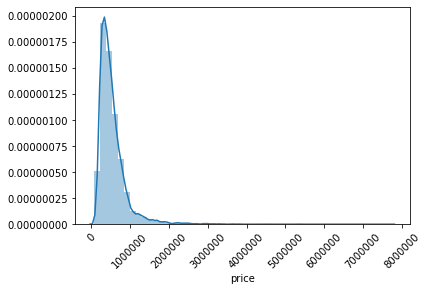

In [7]:
# View the distribution of "price"
sns.distplot(df['price'])
plt.xticks(rotation=45)
plt.show()

### Predictors

In [8]:
# Check the "bedrooms" columns
df['bedrooms'].value_counts().sort_index()

1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.000,33,1.750,1620,6000,1.000,0.000,0.000,5,7,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


- This definitely should be an outlier...33 bedrooms but only 1.75 bathrooms??? Should be dropped at the data cleaning part

In [10]:
# Check the "bathrooms" columns
df['bathrooms'].value_counts().sort_index()

0.500       4
0.750      71
1.000    3851
1.250       9
1.500    1445
1.750    3048
2.000    1930
2.250    2047
2.500    5377
2.750    1185
3.000     753
3.250     589
3.500     731
3.750     155
4.000     136
4.250      79
4.500     100
4.750      23
5.000      21
5.250      13
5.500      10
5.750       4
6.000       6
6.250       2
6.500       2
6.750       2
7.500       1
7.750       1
8.000       2
Name: bathrooms, dtype: int64

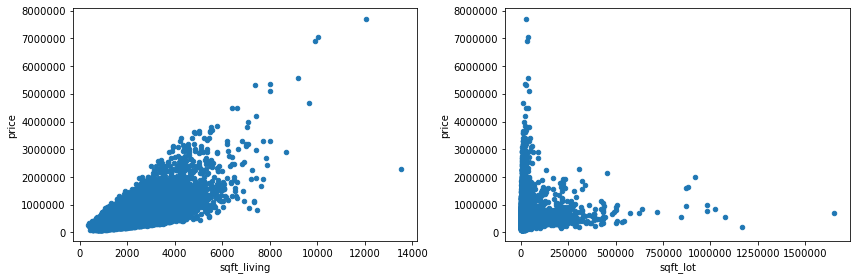

In [11]:
fig = plt.figure(figsize=(12,4))

# price vs sqft_living
ax1 = fig.add_subplot(121)
df.plot.scatter(x='sqft_living', y='price', ax=ax1)

# price vs sqft_lot
ax2 = fig.add_subplot(122)
df.plot.scatter(x='sqft_lot', y='price', ax=ax2)

plt.tight_layout()

- `sqft_living` shows obvious direct linear relationship with price
- `sqft_lot` shows inverse relationship with price (larger lot area with less sale price)

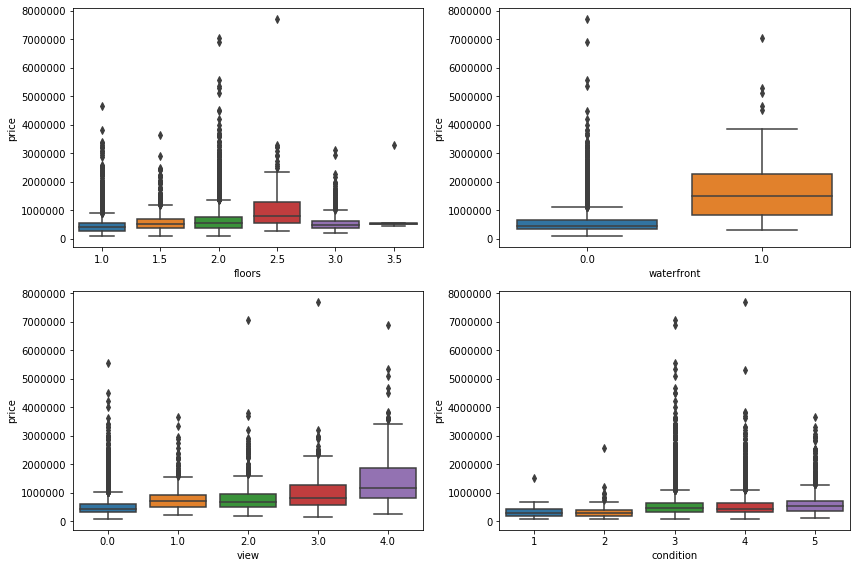

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

# price vs floors
sns.boxplot(data=df, x='floors', y='price', ax=axes[0,0])

# price vs waterfront
sns.boxplot(data=df, x='waterfront', y='price', ax=axes[0,1])

# price vs view
sns.boxplot(data=df, x='view', y='price', ax=axes[1,0])

# price vs condition
sns.boxplot(data=df, x='condition', y='price', ax=axes[1,1])

plt.tight_layout()

- No clear linear relationship between `floors` and price. This column will not be used
- No clear linear relationship between `view` and price. This column will not be used
- No clear linear relationship between `condition` and price. This column will not be used

- The median price of house with waterfront is higher than the median price without waterfront, which indicates waterfront have large variability in price
- `Waterfront` could be one of the top features has strong relationship with house price
- Change to binary indicator, `waterfront`: yes/no

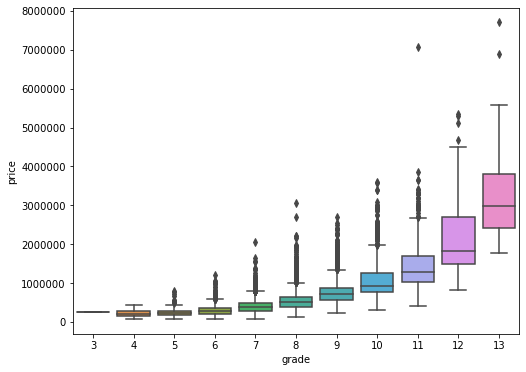

In [13]:
# price vs grade
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(data=df, x='grade', y='price');

- Increse the `grade` also increase the house price

In [14]:
df['yr_renovated'].nunique()

70

- This can be changed to renovated: yes/no

In [15]:
# Check the "zipcode" column
display(df['zipcode'].min())
display(df['zipcode'].max())

98001

98199

- This can be translated into actual city names

### Columns decide to use
`id`, `date`, `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `waterfront`, `grade`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `zipcode`, `lat`, `long`   

## IV. Data Preparation

### Check for duplicates

In [16]:
# Check if the unique identifier has duplicates
df['id'].duplicated().any()

True

In [17]:
# Check duplicates by id
df[df['id'].duplicated(keep=False)].head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.000,3,1.500,1580,5000,1.000,0.000,0.000,3,8,1290,290.0,1939,0.000,98117,47.687,-122.386,1570,4500
94,6021501535,2014-12-23,700000.000,3,1.500,1580,5000,1.000,0.000,0.000,3,8,1290,290.0,1939,0.000,98117,47.687,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.000,4,3.250,4290,12103,1.000,0.000,3.000,3,11,2690,1600.0,1997,0.000,98006,47.550,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.000,4,3.250,4290,12103,1.000,0.000,3.000,3,11,2690,1600.0,1997,0.000,98006,47.550,-122.102,3860,11244
324,7520000520,2014-09-05,232000.000,2,1.000,1240,12092,1.000,nan,0.000,3,6,960,280.0,1922,1984.000,98146,47.496,-122.352,1820,7460
325,7520000520,2015-03-11,240500.000,2,1.000,1240,12092,1.000,0.000,0.000,3,6,960,280.0,1922,1984.000,98146,47.496,-122.352,1820,7460
345,3969300030,2014-07-23,165000.000,4,1.000,1000,7134,1.000,0.000,0.000,3,6,1000,0.0,1943,0.000,98178,47.490,-122.240,1020,7138
346,3969300030,2014-12-29,239900.000,4,1.000,1000,7134,1.000,0.000,0.000,3,6,1000,0.0,1943,nan,98178,47.490,-122.240,1020,7138
371,2231500030,2014-10-01,315000.000,4,2.250,2180,10754,1.000,nan,0.000,5,7,1100,1080.0,1954,0.000,98133,47.771,-122.341,1810,6929
372,2231500030,2015-03-24,530000.000,4,2.250,2180,10754,1.000,0.000,0.000,5,7,1100,1080.0,1954,0.000,98133,47.771,-122.341,1810,6929


In [18]:
# Check the percentage of duplicates
print("Duplicates percentage:", round(df['id'].duplicated(keep=False).mean()*100, 3), "%")

Duplicates percentage: 1.634 %


> **Comment:** 
- Those duplicates have the same values for other columns except 'date' and 'price'. Not sure if it's duplicates or re-sell?
- The duplicates only account for 1.634%
- For better analysis and modeling, these duplicates should be dropped

In [19]:
# Drop duplicates
df = df.drop_duplicates(subset='id', keep=False)

### Check data type and null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 21 columns):
id               21244 non-null int64
date             21244 non-null datetime64[ns]
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
waterfront       18914 non-null float64
view             21181 non-null float64
condition        21244 non-null int64
grade            21244 non-null int64
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
yr_renovated     17469 non-null float64
zipcode          21244 non-null int64
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

> **Comment:** 
- One object data type: "sqft_basment"
- Two columns has null value: "waterfront" and "yr_renovated"

### Cleaning

### `"sqft_basement"`

In [21]:
# Check if the columns contain NaN values
df['sqft_basement'].isna().any()

False

In [22]:
# Check if the columns contain symbols
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '800.0', '540.0', '710.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '290.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [23]:
# Preview rows have "?"
df.loc[df['sqft_basement'] == '?'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,2014-12-05,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,4,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,2014-07-07,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,3,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,3,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,2014-09-16,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,4,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656


In [24]:
# For those has "?", mark "0" for those have equal 'sqrt_living' and 'sqrt_above' values
df.loc[df['sqft_living'] == df['sqft_above'], 'sqft_basement'] = "0"

# Change the rest of "?" into the correct values by subtract 'sqrt_above' from 'sqrt_living'
df.loc[df['sqft_living'] != df['sqft_above'], 'sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [25]:
# Check again
df.loc[df['sqft_basement'] == "?"]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [26]:
# Change datatype to int64
df['sqft_basement'] = df['sqft_basement'].astype(int)

In [27]:
# Check the datatype
df['sqft_basement'].dtype

dtype('int64')

In [28]:
# Check if living area = above area + basement area
(df['sqft_living'] == df['sqft_above'] + df['sqft_basement']).all()

True

### `"basement"`

In [29]:
# Add an extra column to indicate if the house has basement or not
df.loc[df['sqft_basement'] == 0, 'basement'] = "no"
df.loc[df['sqft_basement'] != 0, 'basement'] = "yes"

In [30]:
# Check
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,no
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639,yes
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,1933,nan,98028,47.738,-122.233,2720,8062,no
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000,yes
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503,no


In [31]:
# Check the new column datatype
df['basement'].dtype

dtype('O')

In [32]:
df['basement'].value_counts()

no     12889
yes     8355
Name: basement, dtype: int64

### `"waterfront"`

In [33]:
# Check if 'waterfront' column has NaN values
df['waterfront'].isna().any()

True

In [34]:
# Fill the NaN value with 0
df['waterfront'].fillna(0, inplace=True)

In [35]:
# Check
df['waterfront'].isna().any()

False

In [36]:
df['waterfront'].value_counts()

0.000    21098
1.000      146
Name: waterfront, dtype: int64

In [37]:
# Change into binary indicator
df.loc[df['waterfront'] == 0, 'waterfront'] = "no"
df.loc[df['waterfront'] == 1, 'waterfront'] = "yes"

In [38]:
df['waterfront'].value_counts()

no     21098
yes      146
Name: waterfront, dtype: int64

### `"yr_renovated"`

In [39]:
# Check if 'yr_renovated' column has NaN values
df['yr_renovated'].isna().any()

True

In [40]:
# Fill 'yr_renovated' NaN value with 0
df['yr_renovated'].fillna(0, inplace=True)

In [41]:
df.loc[df['yr_renovated'] == 0].shape

(20508, 22)

In [42]:
# Change into binary indicator
df.loc[df['yr_renovated'] == 0, 'rev'] = "no"
df.loc[df['yr_renovated'] != 0, 'rev'] = "yes"

In [43]:
df['rev'].value_counts()

no     20508
yes      736
Name: rev, dtype: int64

In [44]:
# Check
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,rev
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,no,0.000,3,7,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,no,no
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,no,0.000,3,7,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639,yes,yes
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,no,0.000,3,6,770,0,1933,0.000,98028,47.738,-122.233,2720,8062,no,no
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,no,0.000,5,7,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000,yes,no
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,no,0.000,3,8,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503,no,no


### Obvious outliers

In [45]:
# Drop the obvious outliers (33 bedrooms and 1.75 bathrooms???) which dicussed earlier
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,rev
15856,2402100895,2014-06-25,640000.000,33,1.750,1620,6000,1.000,no,0.000,5,7,1040,580,1947,0.000,98103,47.688,-122.331,1330,4700,yes,no


In [46]:
# Drop that specific rows
df.drop(df.loc[df['bedrooms'] == 33].index, inplace=True)

### Add more new columns

### `"date"`

In [47]:
# Extract month out, will use this month column to find the month with lowest purchasing price
df['month'] = df['date'].dt.month

### `"age"`

In [48]:
# Add a new column to find the house age
df['age'] = 2016 - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,rev,month,age
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,no,0.000,3,7,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,no,no,10,61
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,no,0.000,3,7,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639,yes,yes,12,65
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,no,0.000,3,6,770,0,1933,0.000,98028,47.738,-122.233,2720,8062,no,no,2,83
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,no,0.000,5,7,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000,yes,no,12,51
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,no,0.000,3,8,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503,no,no,2,29


### `"grade"` = `"gd"`

### Note:
Base on the King County official [website](https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-southwest/~/media/depts/assessor/documents/AreaReports/2017/Residential/026.ashx) page 21: 
- Grade 6 is the lowest grade currently meeting [building codes](https://www.fema.gov/emergency-managers/risk-management/earthquake/seismic-building-codes#:~:text=Building%20codes%20are%20sets%20of,and%20welfare%20of%20building%20occupants.). So, any house grade below 6 is consider as "not acceptable"
- House grade above 10 has customered design and high quality features. Any house grade above 10 will be consider as "customer design"

In [49]:
df['grade'].value_counts().sort_index()

3        1
4       27
5      227
6     1952
7     8803
8     6017
9     2597
10    1126
11     393
12      87
13      13
Name: grade, dtype: int64

In [50]:
# Grade 3-5
for u in range(3,6):
    df.loc[df['grade'] == u, 'gd'] = "not acceptable"

# Grade 6-10    
for v in range(6,11):
    df.loc[df['grade'] == v, 'gd'] = str(v)
    
# Grade 10-13
for w in range(11,14):
    df.loc[df['grade'] == w, 'gd'] = "customer design"   

### `"zipcode"`

In [51]:
# import the zipcode data
zp = pd.read_csv('data/Washington_Zipcode.csv')
zp.head()

,zip_code,city,county
0,98001,Auburn,King
1,98002,Auburn,King
2,98003,Federal Way,King
3,98004,Bellevue,King
4,98005,Bellevue,King


In [52]:
# Merge df with zp to find the corresponding city and county based on zipcode
df = df.merge(zp, left_on='zipcode', right_on='zip_code')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,rev,month,age,gd,zip_code,city,county
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,no,0.000,3,7,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,no,no,10,61,7,98178,Seattle,King
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,no,0.000,4,6,880,0,1945,0.000,98178,47.501,-122.248,1190,6780,no,no,6,71,6,98178,Seattle,King
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,no,2.000,3,8,1620,480,1967,0.000,98178,47.509,-122.244,2660,8712,yes,no,7,49,8,98178,Seattle,King
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,no,0.000,3,7,1300,0,1961,0.000,98178,47.505,-122.255,1320,7619,no,no,9,55,7,98178,Seattle,King
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,no,0.000,3,6,860,0,1931,0.000,98178,47.505,-122.272,1650,8775,no,no,2,85,6,98178,Seattle,King


In [53]:
# Find the total number of unique cities
df['city'].nunique()

24

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement', 'rev',
       'month', 'age', 'gd', 'zip_code', 'city', 'county'],
      dtype='object')

In [55]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'date', 'floors', 'view', 'condition', 'grade', 'sqft_above', 
                      'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 
                      'sqft_living15', 'sqft_lot15', 'zip_code', 'county']).reset_index(drop=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,lat,long,basement,rev,month,age,gd,city
0,221900.000,3,1.000,1180,5650,no,47.511,-122.257,no,no,10,61,7,Seattle
1,205425.000,2,1.000,880,6780,no,47.501,-122.248,no,no,6,71,6,Seattle
2,445000.000,3,2.250,2100,8201,no,47.509,-122.244,yes,no,7,49,8,Seattle
3,236000.000,3,1.000,1300,5898,no,47.505,-122.255,no,no,9,55,7,Seattle
4,170000.000,2,1.000,860,5265,no,47.505,-122.272,no,no,2,85,6,Seattle


## Q1. What is the best month to buy a house?

In [56]:
# Create a sub df 
# Group the month and calculate the average house sale price
month_price = df.groupby(['month'])['price'].agg(['count', 'mean']).reset_index()
month_price

,month,count,mean
0,1,955,528635.665
1,2,1217,508902.119
2,3,1835,544333.371
3,4,2187,564607.204
4,5,2377,552069.822
5,6,2150,558796.056
6,7,2187,547008.847
7,8,1910,539296.135
8,9,1746,533696.578
9,10,1848,542573.168


In [57]:
# Define a function to tranlate month in num to words
def month_in_word(num):
    '''
    Change the month from numbers to words.
    ex. 1 => January
    
    Parameters:
    ----------
    Pandas DataFrame with column type: int
    
    Returns:
    --------
    Pandas DataFrame with column type: str
    '''
    if num == 1:
        return "Jan"
    elif num == 2:
        return "Feb"
    elif num == 3:
        return "Mar"
    elif num == 4:
        return "Apr"
    elif num == 5:
        return "May"
    elif num == 6:
        return "Jun"
    elif num == 7:
        return "Jul"
    elif num == 8:
        return "Aug"
    elif num == 9:
        return "Sep"
    elif num == 10:
        return "Oct"
    elif num == 11:
        return "Nov"
    else:
        return "Dec"

In [58]:
# Apply the funtion
month_price['Month'] = month_price['month'].apply(month_in_word)

In [59]:
# Preview
month_price

,month,count,mean,Month
0,1,955,528635.665,Jan
1,2,1217,508902.119,Feb
2,3,1835,544333.371,Mar
3,4,2187,564607.204,Apr
4,5,2377,552069.822,May
5,6,2150,558796.056,Jun
6,7,2187,547008.847,Jul
7,8,1910,539296.135,Aug
8,9,1746,533696.578,Sep
9,10,1848,542573.168,Oct


In [60]:
# Change the "Month" to list
xs = month_price['Month'].to_list()

# Change the corresponding avg price to list
ys = month_price['mean'].to_list()

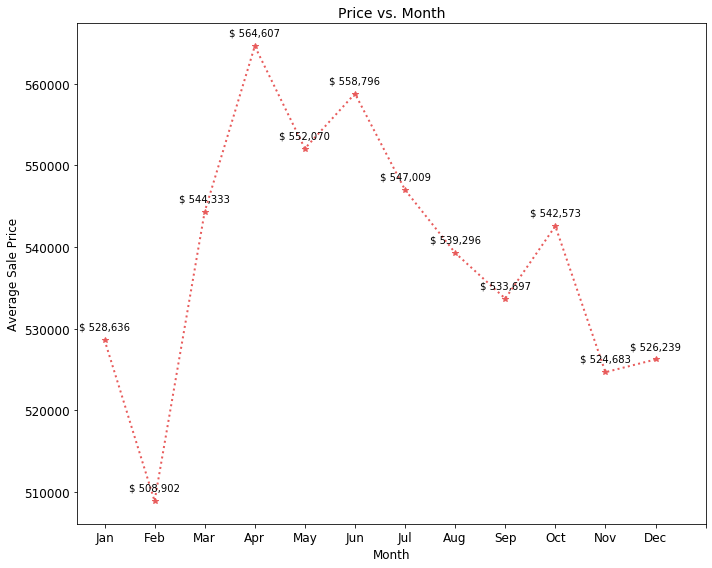

In [61]:
# Plot the average house sale price vs. each month
plt.figure(figsize=(10,8))
plt.plot(xs, ys, '*:', linewidth=2, color='#e85b5b')

plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(0,13,1), fontsize=12)

plt.ylabel('Average Sale Price', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Price vs. Month', fontsize=14)

# Zip join x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = "$ {:,.0f}".format(y)
    plt.annotate(label,                        # this is the text
                 (x,y),                        # this is the coordination point the label
                 textcoords="offset points",   # how to position the text
                 xytext=(0,10),                # distance from text to points (x,y)
                 ha='center')                  # center horizontal alignment

plt.savefig("./images/price vs month.png", dpi=300, bbox_inches='tight') # avoid saved image being cutoff
plt.tight_layout() # automatically adjust plot parameters and nicely fit in the figure
plt.show()

> **Comment:**
- Feburary has the lowest average house sale price (guess hard to sell during cold winter?)
- April has the highest average house sale price (guess families need to move before school starts?)

## Q2. Which region (on real map) in King County should homebuyers look first based on their budget?

### Divide into 5 price ranges

In [62]:
# E: below 300 thousands
df.loc[df['price'] <= 30*10**4, 'group'] = "E"

# D: between 300 and 450 thousands
df.loc[(df['price'] > 30*10**4) & (df['price'] <= 45*10**4), 'group'] = "D"

# C: between 450 and 600 thousands
df.loc[(df['price'] > 45*10**4) & (df['price'] <= 60*10**4), 'group'] = "C"

# B: between 600 and 750 thousands
df.loc[(df['price'] > 60*10**4) & (df['price'] <= 75*10**4), 'group'] = "B"

# A: above 750 thousands
df.loc[df['price'] > 75*10**4, 'group'] = "A"

In [63]:
# Check
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,lat,long,basement,rev,month,age,gd,city,group
0,221900.000,3,1.000,1180,5650,no,47.511,-122.257,no,no,10,61,7,Seattle,E
1,205425.000,2,1.000,880,6780,no,47.501,-122.248,no,no,6,71,6,Seattle,E
2,445000.000,3,2.250,2100,8201,no,47.509,-122.244,yes,no,7,49,8,Seattle,D
3,236000.000,3,1.000,1300,5898,no,47.505,-122.255,no,no,9,55,7,Seattle,E
4,170000.000,2,1.000,860,5265,no,47.505,-122.272,no,no,2,85,6,Seattle,E


In [64]:
df['group'].value_counts().sort_index()

A    3546
B    2648
C    4437
D    6196
E    4416
Name: group, dtype: int64

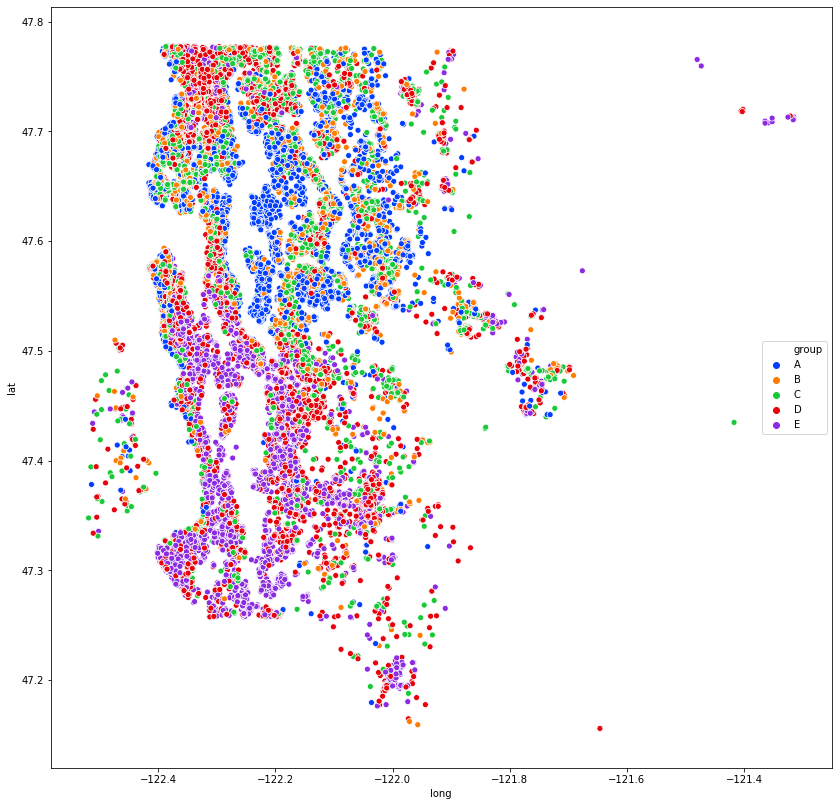

In [65]:
# Plot each house's price group with corresponding longitude and latitude 
fig, ax = plt.subplots(figsize=(14,14))

ax = sns.scatterplot(data=df, 
                x='long', 
                y='lat', 
                hue='group', 
                hue_order=["A", "B", "C", "D", "E"],
                palette = 'bright')

ax.legend(loc=7)

plt.savefig("./images/Price Map.png", dpi=300, bbox_inches='tight')
plt.show()

> **Comment:**
- Higher price houses (Group A and B) are more likely to be found in the north region
- Middle price house (Group C) can be found anywhere
- Lower price houses (Group D and E) are more likely to be found in the south region
- City could be one of the top features that have strong relationship with house price (location matters)

## Want to make a map...

### Label the city on the map

In [66]:
df['city'].nunique()

24

In [67]:
# Want city names in alphabetical order
# Change the city's name into list
order = df.groupby(['city'])['price'].agg(['mean']).index.to_list()
order

['Auburn',
 'Bellevue',
 'Black Diamond',
 'Bothell',
 'Carnation',
 'Duvall',
 'Enumclaw',
 'Fall City',
 'Federal Way',
 'Issaquah',
 'Kenmore',
 'Kent',
 'Kirkland',
 'Maple Valley',
 'Medina',
 'Mercer Island',
 'North Bend',
 'Redmond',
 'Renton',
 'Sammamish',
 'Seattle',
 'Snoqualmie',
 'Vashon Island',
 'Woodinville']

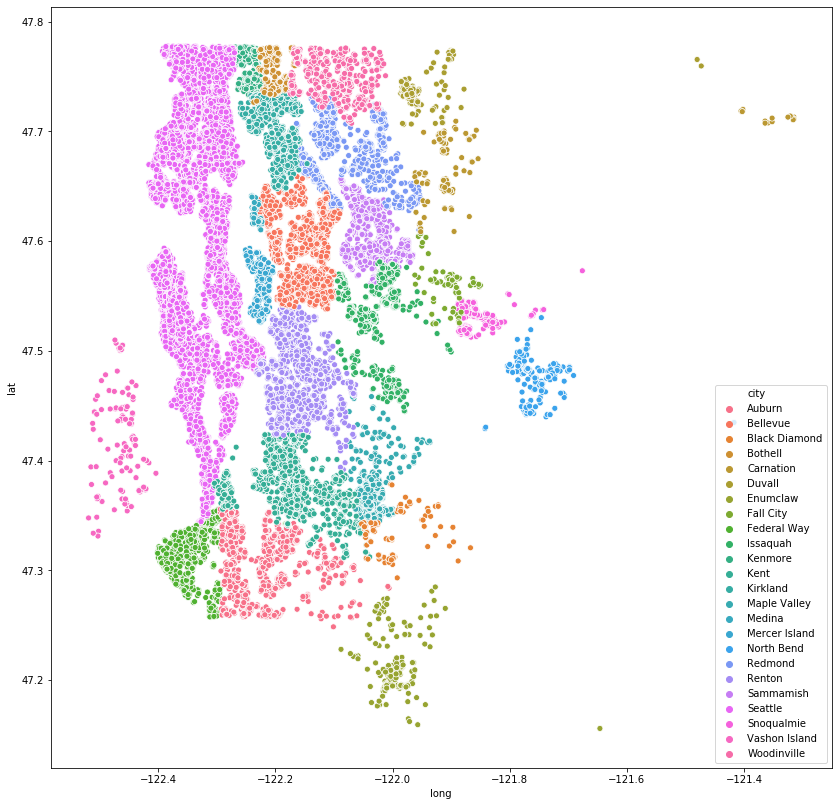

In [68]:
# Plot the city where each house is located with corresponding longitude and latitude
# (P.S. actual text label will be performed in the presentation file)
fig, ax = plt.subplots(figsize=(14,14))

sns.scatterplot(data=df, 
                x='long', 
                y='lat', 
                hue='city', hue_order=order)
plt.savefig("./images/City Map.png", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
# Just wanna know the top right belong to which city
df.loc[(df['long'] >=-121.4)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,lat,long,basement,rev,month,age,gd,city,group
20834,134000.000,2,1.500,980,5000,no,47.708,-121.359,no,yes,5,94,7,Carnation,E
20835,167000.000,1,1.000,780,10235,no,47.713,-121.315,no,no,4,27,6,Carnation,E
20842,150000.000,3,0.750,490,38500,no,47.711,-121.315,no,no,7,57,not acceptable,Carnation,E
20852,150000.000,3,1.000,890,6488,no,47.709,-121.352,no,no,4,88,not acceptable,Carnation,E
20878,200000.000,2,1.750,1320,13052,no,47.712,-121.352,no,no,11,36,7,Carnation,E
20882,241000.000,2,1.750,1070,9750,no,47.713,-121.319,no,no,10,21,7,Carnation,E
20898,155000.000,2,1.000,1010,43056,no,47.711,-121.316,no,no,10,26,not acceptable,Carnation,E
20900,375000.000,3,1.750,2140,13598,no,47.714,-121.321,yes,no,4,46,7,Carnation,D
20906,160000.000,3,1.000,1340,18552,no,47.713,-121.325,no,no,1,81,not acceptable,Carnation,E
20919,160000.000,3,1.000,1140,3240,no,47.709,-121.364,no,no,3,106,6,Carnation,E


### Drop unecessary columns

In [70]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'lat', 'long', 'basement', 'rev', 'month', 'age', 'gd',
       'city', 'group'],
      dtype='object')

### Prepare the data will be used for `modeling`

In [71]:
# Drop unecessary columns
data = df.drop(columns=['lat', 'long', 'month', 'group']).reset_index(drop=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,basement,rev,age,gd,city
0,221900.000,3,1.000,1180,5650,no,no,no,61,7,Seattle
1,205425.000,2,1.000,880,6780,no,no,no,71,6,Seattle
2,445000.000,3,2.250,2100,8201,no,yes,no,49,8,Seattle
3,236000.000,3,1.000,1300,5898,no,no,no,55,7,Seattle
4,170000.000,2,1.000,860,5265,no,no,no,85,6,Seattle


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21243 entries, 0 to 21242
Data columns (total 11 columns):
price          21243 non-null float64
bedrooms       21243 non-null int64
bathrooms      21243 non-null float64
sqft_living    21243 non-null int64
sqft_lot       21243 non-null int64
waterfront     21243 non-null object
basement       21243 non-null object
rev            21243 non-null object
age            21243 non-null int64
gd             21243 non-null object
city           21243 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


## V. Modeling

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot
import eli5

## Basic Model
- Exclude any categorical variables
- Only include continuous variables

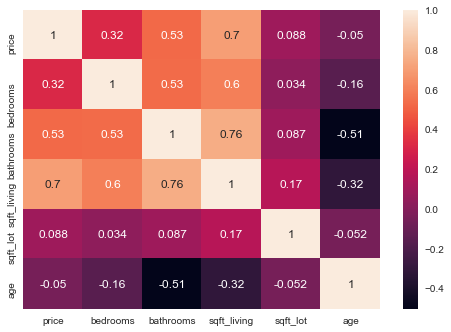

In [74]:
# Visualize relationships between numeric columns
ax = sns.heatmap(data.corr(), annot=True)
ax.set_ylim(6, 0)
plt.show()

> **Comment:** Multicollinearity issue
- Some of the independent variables have high correlation value with other independent variables

In [75]:
# Set a threshold
# Preview any corrrelation value 0.5<=issue<1 (consider as multicollinearity issue)
abs(data.corr()) >= 0.5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,age
price,True,False,True,True,False,False
bedrooms,False,True,True,True,False,False
bathrooms,True,True,True,True,False,True
sqft_living,True,True,True,True,False,False
sqft_lot,False,False,False,False,True,False
age,False,False,True,False,False,True


> **Comment:** It seems like `"bedrooms"`, `"bathrooms"`, `"sqft_living"`, and `"age"` are highly correlated among each other

### Double Check

In [76]:
# Save absolute value of correlation matrix as a sub df
# Converts all values to absolute value
# Stacks the row:column pairs into a multindex
# Reset the index to set the multindex to seperate columns
# Sort values
# 0 is the column automatically generated by the stacking

ccl = data.corr().abs().stack().reset_index().sort_values(0)
ccl.head()

,level_0,level_1,0
25,sqft_lot,bedrooms,0.034
10,bedrooms,sqft_lot,0.034
30,age,price,0.050
5,price,age,0.050
29,sqft_lot,age,0.052


In [77]:
# zip "level_0" and "level_1" in a new column named "pairs"
ccl['pairs'] = list(zip(ccl.level_0, ccl.level_1))

# Set "pairs" as index column
ccl.set_index(['pairs'], inplace=True)

# Drop unnecessary columns
ccl.drop(columns=['level_0', 'level_1'], inplace=True)

# Rename correlation as "cc"
ccl.columns = ['cc']

# Drop the duplicates
ccl.drop_duplicates(inplace=True)

# Only keep correlation value 0.5 <= cc <1
ccl[(ccl.cc >= 0.5) & (ccl.cc < 1)]

,cc
pairs,
"(bathrooms, age)",0.505
"(bathrooms, price)",0.526
"(bathrooms, bedrooms)",0.530
"(sqft_living, bedrooms)",0.595
"(price, sqft_living)",0.701
"(sqft_living, bathrooms)",0.755


> **Comment:** `"bedrooms"`, `"bathrooms"`, `"sqft_living"`, and `"age"`

### Create a new column "rm_ratio" = bedrooms / bathrooms

In [78]:
data['rm_ratio'] = data['bedrooms'] / data['bathrooms']
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,basement,rev,age,gd,city,rm_ratio
0,221900.000,3,1.000,1180,5650,no,no,no,61,7,Seattle,3.000
1,205425.000,2,1.000,880,6780,no,no,no,71,6,Seattle,2.000
2,445000.000,3,2.250,2100,8201,no,yes,no,49,8,Seattle,1.333
3,236000.000,3,1.000,1300,5898,no,no,no,55,7,Seattle,3.000
4,170000.000,2,1.000,860,5265,no,no,no,85,6,Seattle,2.000


In [79]:
# Drop unnecessary columns
data.drop(columns=['bedrooms', 'bathrooms'], inplace=True)
data.head()

,price,sqft_living,sqft_lot,waterfront,basement,rev,age,gd,city,rm_ratio
0,221900.000,1180,5650,no,no,no,61,7,Seattle,3.000
1,205425.000,880,6780,no,no,no,71,6,Seattle,2.000
2,445000.000,2100,8201,no,yes,no,49,8,Seattle,1.333
3,236000.000,1300,5898,no,no,no,55,7,Seattle,3.000
4,170000.000,860,5265,no,no,no,85,6,Seattle,2.000


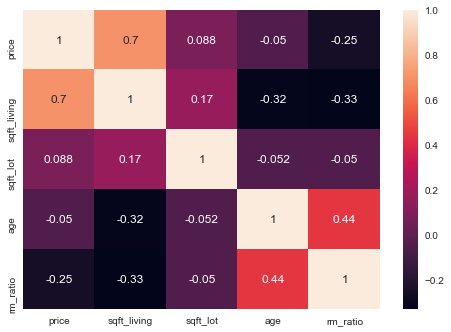

In [80]:
# Visualize relationships between numeric columns again
ax = sns.heatmap(data.corr(), annot=True)
ax.set_ylim(5, 0)
plt.show()

In [81]:
# Set X and y
# Ignore categorical columns for basic model

X = data[['sqft_living', 'sqft_lot', 'age', 'rm_ratio']]
y = data['price']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# Scale the data
scaler = StandardScaler()

# Fit and transform train data
# Transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model it
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

# Grab predictions for train and test set
y_train_preds = linreg.predict(X_train_scaled)
y_test_preds = linreg.predict(X_test_scaled)

# Evaluate
print(f"Train R2: {r2_score(y_train, y_train_preds):.3f}")
print(f"Test R2: {r2_score(y_test, y_test_preds):.3f}")

print("------*------*------")

print(f"Train RMSE: {mean_squared_error(y_train, y_train_preds, squared=False):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_test_preds, squared=False):.3f}")

Train R2: 0.537
Test R2: 0.529
------*------*------
Train RMSE: 252724.942
Test RMSE: 245604.251


> **Comment:** 
- The test R2 is slightly smaller than the train R2
- Only about 53% of the variations in dependent variable are explained by the independent variable in basic mode
- The RMSE value is very large which means the spread of the y values and the predicted y values are far away
- The test RMSE is smaller than train RMSE which indicates underfitting and reflect poor ability of the model to predict unseen data
- Only use continouous variables to build the linear model is not enough

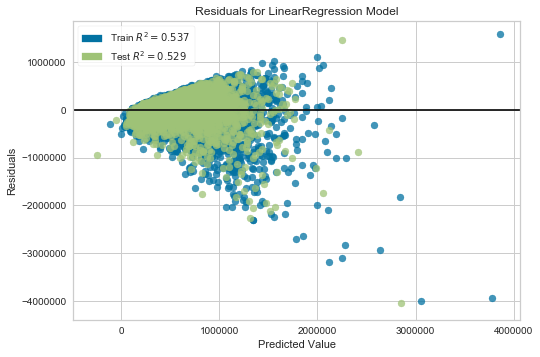

In [82]:
# Visualize residuals
visualizer = ResidualsPlot(linreg, hist=False)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

> **Comment:**
- The points did not randomly disperse around the mean 0
- The scatter plots create a cone-like shape => heteroscedastic
- Did not satisfy linear regression assumption
- Re-build the model by adding categorical variables to predictators 

## Model 1
- Use all the independent variables but separate into continuous and categorical variables

In [83]:
display(data.columns)
display(data.shape)

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'basement', 'rev',
       'age', 'gd', 'city', 'rm_ratio'],
      dtype='object')

(21243, 10)

In [84]:
continuous = ['sqft_living', 'sqft_lot', 'rm_ratio', 'age']

categorical = ['waterfront', 'basement', 'rev', 'gd', 'city']

target = ['price']

###  Continuous Variables

In [85]:
data_cont = data[continuous]
cont_name = [f'{col}' for col in data_cont.columns] # create continuous columns' name (will be used later)

### Categorical Variables

In [86]:
# One Hot Encoding
cat_ohe = pd.get_dummies(data[categorical], prefix=categorical, drop_first=True)

### Combine Continuous and Categorical Variables

In [87]:
preprocessed = pd.concat([data_cont, cat_ohe], axis=1)
preprocessed.head()

,sqft_living,sqft_lot,rm_ratio,age,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville
0,1180,5650,3.000,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,880,6780,2.000,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2100,8201,1.333,49,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1300,5898,3.000,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,860,5265,2.000,85,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
# Set X and y
X = preprocessed
y = data[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# scale it
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model it
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

# Grab predictions for train and test set
train_preds = linreg.predict(X_train_scaled)
test_preds = linreg.predict(X_test_scaled)

# Evaluate
print(f"Train R2: {r2_score(y_train, train_preds):.3f}")
print(f"Test R2: {r2_score(y_test, test_preds):.3f}")

print("------*------*------")

print(f"Train RMSE: {mean_squared_error(y_train, train_preds, squared=False):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

Train R2: 0.734
Test R2: 0.731
------*------*------
Train RMSE: 191709.797
Test RMSE: 185363.812


> **Comment:**
- The R2 shows improvement which means Model 1 generalized much better than the basic model
- The test R2 is slightly less than the train R2
- About 73% of the variations in dependent variable are explained by the independent variable
- The RMSE value is very large which means the spread of the y values and the predicted y values are far away
- The test RMSE is smaller than train RMSE which indicates underfitting

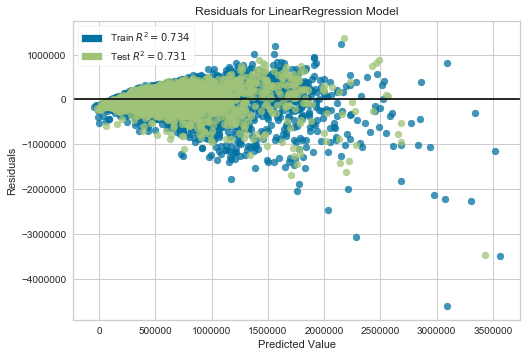

In [89]:
# Visualize residuals for 1st approach
visualizer = ResidualsPlot(linreg, hist=False)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

> **Comment:**
- The points did not randomly disperse around the mean 0
- The scatter plots create a cone-like shape => heteroscedastic
- Did not satisfy linear regression assumption
- Try log transformation for the continuous variables to see if can improve the model 

## Model 2
- Perform the log transformation before scaling the continuous variable

### Log Transformation

In [90]:
# Log transformation
log_cont = np.log(data_cont)
log_cont.head()

,sqft_living,sqft_lot,rm_ratio,age
0,7.073,8.639,1.099,4.111
1,6.780,8.822,0.693,4.263
2,7.650,9.012,0.288,3.892
3,7.170,8.682,1.099,4.007
4,6.757,8.569,0.693,4.443


### Combine Continuous and Categorical Variables

In [91]:
processed = pd.concat([log_cont, cat_ohe], axis=1)
processed.head()

,sqft_living,sqft_lot,rm_ratio,age,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville
0,7.073,8.639,1.099,4.111,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6.780,8.822,0.693,4.263,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,7.650,9.012,0.288,3.892,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.170,8.682,1.099,4.007,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6.757,8.569,0.693,4.443,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [92]:
# Set X and y
X = processed
y = data[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# scale it
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# log y
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# model it
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train_log)

# grab predictions for train and test set
y_train_preds_log = linreg.predict(X_train_scaled)
y_test_preds_log = linreg.predict(X_test_scaled)

# undo the log
y_train_preds = np.exp(y_train_preds_log)
y_test_preds = np.exp(y_test_preds_log)

# evaluate
print(f"Train R2: {r2_score(y_train_log, y_train_preds_log):.3f}")
print(f"Test R2: {r2_score(y_test_log, y_test_preds_log):.3f}")

print("------*------*------")

print(f"Train RMSE logged: {mean_squared_error(y_train_log, y_train_preds_log, squared=False):.3f}")
print(f"Test RMSE logged: {mean_squared_error(y_test_log, y_test_preds_log, squared=False):.3f}")

print("------*------*------")

print(f"Train RMSE: {mean_squared_error(y_train, y_train_preds, squared=False):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_test_preds, squared=False):.3f}")

Train R2: 0.758
Test R2: 0.749
------*------*------
Train RMSE logged: 0.258
Test RMSE logged: 0.261
------*------*------
Train RMSE: 184798.296
Test RMSE: 179046.481


> **Comment:**
- The R2 shows improvement for Model 2 which means the model generalized better after log transformation
- The test R2 is less than the train R2
- About 75% of the variations in dependent variable are explained by the independent variable
- The RMSE value becomes much closer to 0 which means the spread of the y values and the predicted y values are getting closer
- The test RMSE logged is slightly larger than train RMSE logged
- What happen if try log transformation on skew columns only, will it be improved?

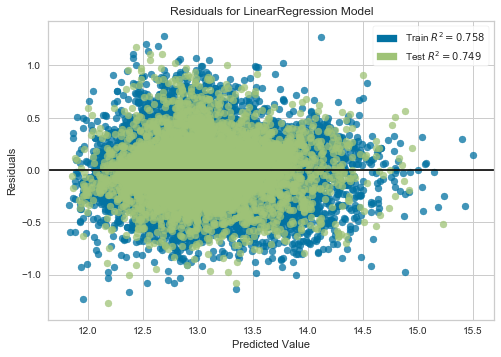

In [93]:
# Visualize residuals for 2nd approach
visualizer = ResidualsPlot(linreg, hist=False)

visualizer.fit(X_train_scaled, y_train_log)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test_log)  # Evaluate the model on the test data
visualizer.show();                           # Finalize and render the figure

> **Comment:**
- The points randomly disperse around the horizontal axis
- The scatter plots did not show a pattern => Homoscedasticity
- Satisfy linear regression assumption

## Model 3
- Only log transform the skew (continuous) variables

In [94]:
# Put the continuous and target columns together into 1D
skew_test_col = [*target, *cont_name]
skew_test_col

['price', 'sqft_living', 'sqft_lot', 'rm_ratio', 'age']

In [95]:
# Find the skewness
from scipy.stats import skew

skewness = skew(data[skew_test_col]).reshape(1, -1)
skewness

array([[ 4.03937224,  1.4720193 , 13.03866565,  1.51230277,  0.47906919]])

In [96]:
# Put in the dataframe
skew_df = pd.DataFrame(skewness, columns=skew_test_col)
skew_df

,price,sqft_living,sqft_lot,rm_ratio,age
0,4.039,1.472,13.039,1.512,0.479


> **Comment:** 
- Skewness value greater than 1 is consider as highly skewed
- Except `"age"`, other columns are all highly skewed

### Continuous Variable

In [97]:
# Unskew
unskew_col = ['age']
unskew_data = data[unskew_col]

# Skew
skew_col = ['sqft_living', 'sqft_lot', 'rm_ratio']
skew_data = data[skew_col]
log_skew_data = np.log(skew_data) # Log the skew columns

In [98]:
# Combine the unskew column and log-transformed skew columns
partial_log = pd.concat([log_skew_data, unskew_data], axis=1)
partial_log.head()

,sqft_living,sqft_lot,rm_ratio,age
0,7.073,8.639,1.099,61
1,6.780,8.822,0.693,71
2,7.650,9.012,0.288,49
3,7.170,8.682,1.099,55
4,6.757,8.569,0.693,85


### Combine Continuous and Categorical Variables together

In [99]:
processed = pd.concat([partial_log, cat_ohe], axis=1)
processed.head()

,sqft_living,sqft_lot,rm_ratio,age,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville
0,7.073,8.639,1.099,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6.780,8.822,0.693,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,7.650,9.012,0.288,49,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.170,8.682,1.099,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6.757,8.569,0.693,85,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
# Set X and y
X = processed
y = data[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# scale it
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# log y
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# model it
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train_log)

# grab predictions for train and test set
y_train_preds_log = linreg.predict(X_train_scaled)
y_test_preds_log = linreg.predict(X_test_scaled)

# undo the log
y_train_preds = np.exp(y_train_preds_log)
y_test_preds = np.exp(y_test_preds_log)

# evaluate
print(f"Train R2: {r2_score(y_train_log, y_train_preds_log):.3f}")
print(f"Test R2: {r2_score(y_test_log, y_test_preds_log):.3f}")

print("------*------*------")

print(f"Train RMSE logged: {mean_squared_error(y_train_log, y_train_preds_log, squared=False):.3f}")
print(f"Test RMSE logged: {mean_squared_error(y_test_log, y_test_preds_log, squared=False):.3f}")

print("------*------*------")

print(f"Train RMSE: {mean_squared_error(y_train, y_train_preds, squared=False):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_test_preds, squared=False):.3f}")

Train R2: 0.774
Test R2: 0.765
------*------*------
Train RMSE logged: 0.250
Test RMSE logged: 0.253
------*------*------
Train RMSE: 178594.477
Test RMSE: 172966.450


> **Comment:**
- The R2 shows improvement for Model 3 which means the model generalized better after partial-log transformation
- The test R2 is smaller than train R2
- About 76% of the variations in dependent variable are explained by the independent variable
- The test RMSE logged is slightly larger than train RMSE logged 

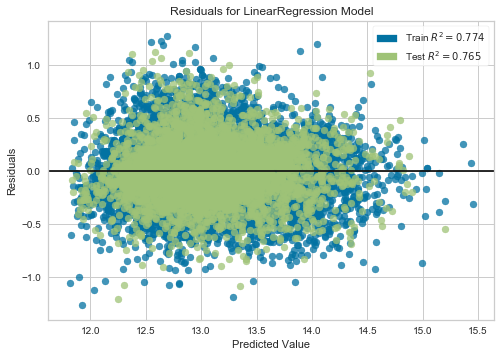

In [101]:
# Visualize residuals for 3rd approach
visualizer = ResidualsPlot(linreg, hist=False)

visualizer.fit(X_train_scaled, y_train_log)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test_log)  # Evaluate the model on the test data
visualizer.show();                           # Finalize and render the figure

> **Comment:**
- The points randomly disperse around the mean 0
- The scatter plots did not show a pattern => Homoscedasticity
- Satisfy linear regression assumption

## Q3. What features help predict home price?
- Features help predicting home price include: `"sqft_living"`, `"sqft_lot"`, `"rm_ratio"`, `"age"`, `"waterfront"`, `"basement"`, `"renovation"`, `"grade"`, and `"city"`

## Predict the house price with my model

In [102]:
# getting the used column names for the df
used_cols = [*continuous, *categorical]
used_cols

['sqft_living',
 'sqft_lot',
 'rm_ratio',
 'age',
 'waterfront',
 'basement',
 'rev',
 'gd',
 'city']

### Try my model

In [103]:
sqft_living = input("What's the sqft of living?")

sqft_lot = input("What's the sqft of lot?")

bedrooms = input("How many bedrooms?")
bedrooms = float(bedrooms)

bathrooms = input("How many bathrooms?")
bathrooms = float(bedrooms)

rm_ratio = bedrooms / bathrooms

age = input("What's the house age?")

waterfront = input("Do you have a view of waterfront? (yes or no)")

basement = input("Do you have a basement? (yes or no)")

rev = input("Is this a renovated house? (yes or no)")

gd = input("What's the grading of the house? (3 ~ 13)")
for i in range(3,6):
    if gd == str(i):
        gd = "not acceptable"  

for j in range(11,14):
    if gd == str(j):
        gd = "customer design"      
     
option = input("Do you know the city option? (yes or no)")
if option == "no":
    print(order)
else:
    print("Great!")
    
city = (input("Which city do you wanna live?")).title()

What's the sqft of living?2000
What's the sqft of lot?3000
How many bedrooms?3
How many bathrooms?3
What's the house age?60
Do you have a view of waterfront? (yes or no)no
Do you have a basement? (yes or no)no
Is this a renovated house? (yes or no)no
What's the grading of the house? (3 ~ 13)8
Do you know the city option? (yes or no)no
['Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'North Bend', 'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie', 'Vashon Island', 'Woodinville']
Which city do you wanna live?fall city


### Note:
- Now, click this cell, then you can run the cell all below :)

In [104]:
# creating an empty dataframe for the new row
test = pd.DataFrame(columns=used_cols)

# adding the details provided into the empty dataframe
test = test.append({'sqft_living': sqft_living,
                    'sqft_lot': sqft_lot,
                    'rm_ratio': rm_ratio,
                    'age': age, 
                    'waterfront': waterfront,
                    'basement': basement,
                    'rev': rev,
                    'gd': gd,
                    'city': city}, ignore_index=True)

In [105]:
test

,sqft_living,sqft_lot,rm_ratio,age,waterfront,basement,rev,gd,city
0,2000,3000,1.000,60,no,no,no,8,Fall City


### Continuous Variable

In [106]:
# unskew_col = ['age']
unskew_test = test[unskew_col]

# skew_col = ['sqft_living', 'sqft_lot', 'rm_ratio']
skew_test = test[skew_col]
log_skew_test = np.log(skew_test.astype(float))

In [107]:
# Put continuous variable into dataframe
partial_log_test = pd.concat([log_skew_test, unskew_test], axis=1)
partial_log_test.head()

,sqft_living,sqft_lot,rm_ratio,age
0,7.601,8.006,0.000,60


### Categorical Variables

In [108]:
cat_test= test[categorical]
cat_test.columns

Index(['waterfront', 'basement', 'rev', 'gd', 'city'], dtype='object')

In [109]:
ohe_test = pd.DataFrame(columns = cat_ohe.columns)
ohe_test

,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville


In [110]:
# Create a dictionay
ohe_dict = {}

for col_type in cat_test.columns: # categorical column defined earlier (the shorter one)
    
    col_list = [c for c in ohe_test.columns.to_list() if col_type in c] # ohe column list (the longer one)
    
    for x in col_list:
        if cat_test[col_type][0] in x: # check the test dictionay with input values
            ohe_dict[x] = 1
            
        else:
            ohe_dict[x] = 0            

In [111]:
# Put the categorical results in a dataframe
ohe_test = ohe_test.append(ohe_dict, ignore_index=True)
ohe_test

,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Combine continuous and categorical 

In [112]:
test_processed = pd.concat([partial_log_test, ohe_test], axis=1)
test_processed

,sqft_living,sqft_lot,rm_ratio,age,waterfront_yes,basement_yes,rev_yes,gd_6,gd_7,gd_8,gd_9,gd_customer design,gd_not acceptable,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon Island,city_Woodinville
0,7.601,8.006,0.000,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scale

In [113]:
test_processed_scaled = scaler.transform(test_processed)

### Predict customerization

In [114]:
test_pred = linreg.predict(test_processed_scaled)
est_price = np.exp(test_pred).flatten().tolist() # flatten was used to change ndarray into 1D
print("Your estimate house price is $", round(est_price[0]))

Your estimate house price is $ 628244


## Q4. What are the top features that have strong relationship with home price?
- There are four top features have strong relationship with home price
1. `"sqft_living"`
2. `"grade"`
3. `"waterfront"`
4. `"City"`

## Appendix
Material for presentation

In [115]:
# Define a function that used my model to predict the house price 

def predict_house_price(sqft_living, sqft_lot, rm_ratio, age, waterfront, basement, rev, gd, city):

    '''
    Predict the house price in King County, Washington
    
    Parameters:
    ----------
    sqft_living: area (ft^2) of the living space, type: float
    
    sqft_log: area (ft^2) of the lot space, type: float
    
    rm_ratio: number of bedrooms divide by number of bathrooms, type: float
    
    waterfront: whether the house a view of waterfront, yes or no,  type: string
    
    basement: whether the house a basement, yes or no, type: string
    
    rev: whether the house was rennovated, yes or no, type: string
    
    gd: grade of the house (3~13), type: string
        grade 3~5 is considered as "not acceptable"
        grade 11~13 is considered as "customer design" 
    
    city: city of the house, type: string, uppercase for the first letter
    
    Returns:
    --------
    NumPy ndarray with estimate house price
    '''
    
    # creating an empty dataframe for the new row
    test = pd.DataFrame(columns=used_cols)

    # adding the details provided into the empty dataframe
    test = test.append({'sqft_living': sqft_living,
                    'sqft_lot': sqft_lot,
                    'rm_ratio': rm_ratio,
                    'age': age, 
                    'waterfront': waterfront,
                    'basement': basement,
                    'rev': rev,
                    'gd': gd,
                    'city': city}, ignore_index=True)
    
    # unskew_col = ['age']
    unskew_test = test[unskew_col]

    # skew_col = ['sqft_living', 'sqft_lot', 'rm_ratio']
    skew_test = test[skew_col]
    log_skew_test = np.log(skew_test.astype(float))
    
    # Put continuous variable into dataframe
    partial_log_test = pd.concat([log_skew_test, unskew_test], axis=1)
    
    # Create a blank categorical df
    cat_test= test[categorical]
    ohe_test = pd.DataFrame(columns = cat_ohe.columns)
    
    # Create a dictionay
    ohe_dict = {}
    for col_type in cat_test.columns: # categorical column defined earlier (the shorter one)
        col_list = [c for c in ohe_test.columns.to_list() if col_type in c] # ohe column list (the longer one)
        for x in col_list:
            if cat_test[col_type][0] in x: # check the test dictionay with input values
                ohe_dict[x] = 1
            else:
                ohe_dict[x] = 0
    
    # Put the categorical results in a dataframe
    ohe_test = ohe_test.append(ohe_dict, ignore_index=True)
    
    # Put continuous and categorical columns together
    test_processed = pd.concat([partial_log_test, ohe_test], axis=1)

    # scale
    test_processed_scaled = scaler.transform(test_processed)
    
    # predict
    test_pred = linreg.predict(test_processed_scaled)
    result = np.exp(test_pred)
    
    return result.flatten()

### 1. `"sqft_living"`

### Test sqft_living price different in my model
- 1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle"
- 2000, 1500, 3/2, 70, "yes", "no", "no", "8", "Seattle"

In [116]:
liv_1000 = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle")
liv_1000

array([449372.42427866])

In [117]:
liv_2000 = predict_house_price(2000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle")
liv_2000

array([626513.03993961])

In [118]:
liv_diff = liv_2000 - liv_1000
liv_diff

array([177140.61566095])

> **Comment:** Increase sqft_living increase the price of house (Observed eariler at data understanding part)

### 2. `"grade"`

In [119]:
# Create a sub-df to display the average price of each house grade
grade_df = data.groupby(['gd'])['price'].agg(['mean']).sort_values(by='mean')
grade_df

,mean
gd,
not acceptable,245049.024
6,303997.118
7,403085.931
8,543327.275
9,773260.822
10,1071865.478
customer design,1686556.103


In [120]:
# Change the index into list
xs = grade_df.index.tolist()

# Change the mean column values into list
ys = grade_df.values.flatten().tolist()

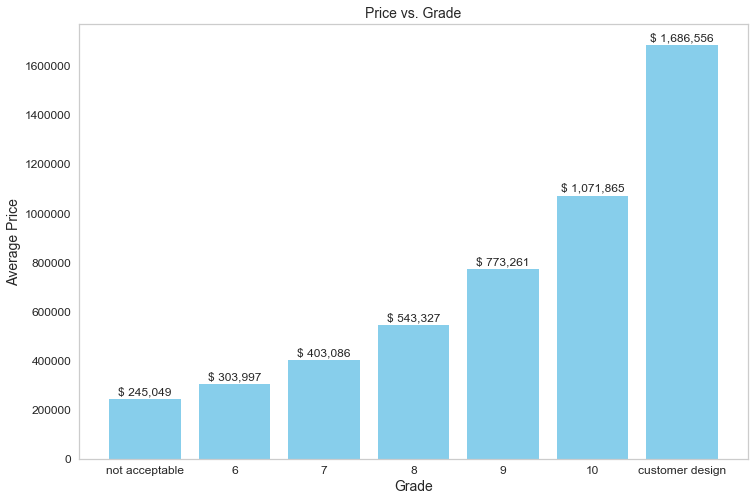

In [121]:
# Plot with a bar plot to show the average price difference between w/ and w/o waterfront
plt.figure(figsize=(12,8))

plt.bar(xs, ys, color='skyblue')

plt.xlabel('Grade', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Average Price', fontsize=14)
plt.yticks(fontsize=12)

plt.title('Price vs. Grade', fontsize=14)

# Zip join x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = "$ {:,.0f}".format(y)
    plt.annotate(label,                       # this is the text
                 (x,y),                       # this is the coordination point the label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,4),                # distance from text to points (x,y)
                 ha='center',
                 fontsize=12)                 # center horizontal alignment

plt.grid(b=False)                             # turn off the gird

plt.savefig("./images/grade difference.png", dpi=300, bbox_inches='tight')
plt.show()

> **Comment:**
- "customer design" grade has the highest average sale price 
- The construction material and level of craftmanship related to house grading thus higher grade, better quality, and higher price

### Test grade price different in my model
- 1000, 1500, 3/2, 70, "no", "no", "no", "10", "Seattle"
- 1000, 1500, 3/2, 70, "no", "no", "no", "9", "Seattle"

In [122]:
grade_9 = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "9", "Seattle")
grade_9

array([553041.57710876])

In [123]:
grade_8 = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle")
grade_8

array([449372.42427866])

In [124]:
grade_difference = grade_9 - grade_8
grade_difference

array([103669.1528301])

> **Comment:** Same house in Seattle with different house grade has a huge price different

### 3. `"waterfront"`

In [125]:
# Create a sub-df to display average price different between house with waterfront and without waterfront
water_df = data.groupby(['waterfront'])['price'].agg(['mean'])
water_df

,mean
waterfront,
no,534165.674
yes,1717214.726


In [126]:
# Change the index into list
xs = water_df.index.to_list()

# Change the mean column values into list
ys = water_df.values.flatten().tolist() # flatten was used to change ndarray into 1D array

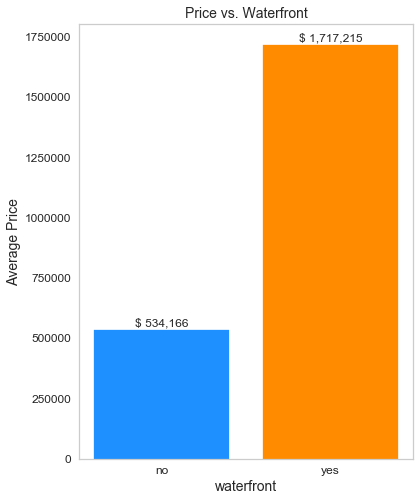

In [127]:
# Plot with a bar plot to show the average price difference between w/ and w/o waterfront
plt.figure(figsize=(6,8))

ax = plt.bar(xs, ys)
ax[0].set_color('dodgerblue') # no
ax[1].set_color('darkorange') # yes

plt.xlabel('waterfront', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Average Price', fontsize=14)
plt.yticks(fontsize=12)

plt.title('Price vs. Waterfront', fontsize=14)

# Zip join x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = "$ {:,.0f}".format(y)
    plt.annotate(label,                       # this is the text
                 (x,y),                       # this is the coordination point the label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,4),                # distance from text to points (x,y)
                 ha='center',
                 fontsize=12)                 # center horizontal alignment

plt.grid(b=False)                             # turn off the gird

plt.savefig("./images/waterfront difference.png", dpi=300, bbox_inches='tight')
plt.show()

> **Comment:** From this bar plot we can see that the price between house w/ and  w/o waterfront has a huge difference

### Test Waterfront Price different in my model
Start a random house example, only change the `waterfront` variable
- 1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle"
- 1000, 1500, 3/2, 70, "yes", "no", "no", "8", "Seattle"

In [128]:
without_waterfront = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle")
without_waterfront

array([449372.42427866])

In [129]:
with_waterfront = predict_house_price(2000, 1500, 3/2, 70, "yes", "no", "no", "8", "Seattle")
with_waterfront

array([1048091.9749952])

In [130]:
waterfront_difference = with_waterfront - without_waterfront
waterfront_difference

array([598719.55071654])

> **Comment:** 
- Same house in Seattle has a huge price difference whether the house has waterfront or not
- Not every city is located near water
- Geography location makes "waterfront" important thus has strong relationship with house price

### 4. `"city"`

In [131]:
# Create a series with different cities and corresponding average sale price
cp = data.groupby(['city'])['price'].mean().sort_values()

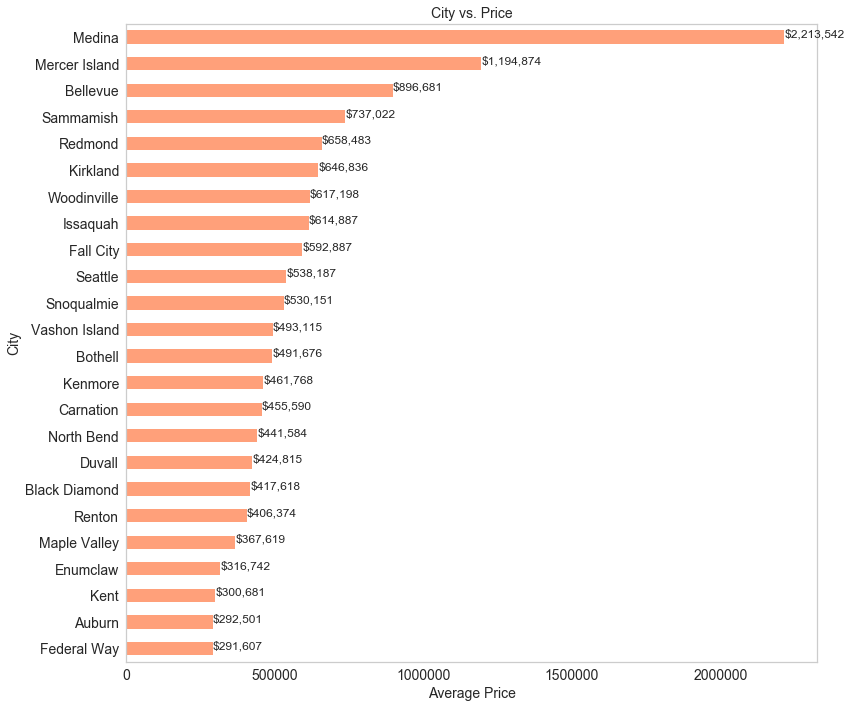

In [132]:
# Plot with a horizontal bar plot to show the average price difference between different cities
plt.figure(figsize=(12,10))

ax = cp.plot(kind='barh', color='lightsalmon')

plt.xlabel('Average Price', fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('City', fontsize=14)
plt.yticks(fontsize=14)

plt.title('City vs. Price', fontsize=14)
plt.grid(b=False)                             

# Label cities with corresponding mean values
[ax.text(v, i, '${:,.0f}'.format(v), size=12) for i, v in enumerate(cp)];

plt.savefig("./images/city difference.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

> **Comment:**
- The top 3 cities are `Medina`, `Mercer Island` and `Bellevue`
- Compare with real map (labeling in presentation file), we can see that the top 3 cities locate in the center of North region with lake nearby

### Test city price different in my model
Start a random house example, only change the `city` variable
- 1000, 1500, 3/2, 70, "no", "no", "no", "8", "Medina"
- 1000, 1500, 3/2, 70, "no", "no", "no", "8", "Fall City"

In [133]:
medina = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "8", "Medina")
medina

array([890222.39102438])

In [134]:
seattle = predict_house_price(1000, 1500, 3/2, 70, "no", "no", "no", "8", "Seattle")
seattle

array([449372.42427866])

In [135]:
city_difference = medina - seattle
city_difference

array([440849.96674572])

> **Comment:** Same house with different city location has a huge price different

### Appendix: Feature Weight and Coefficient

In [136]:
import eli5
eli5.show_weights(linreg, feature_names=list(processed.columns), top=37, show_feature_values=True)

Weight?,Feature
+13.052,<BIAS>
+0.236,city_Seattle
+0.203,sqft_living
+0.171,city_Bellevue
+0.125,city_Kirkland
+0.115,city_Redmond
+0.115,age
+0.093,city_Sammamish
+0.087,city_Mercer Island
+0.087,city_Issaquah


> **Comment:**
- city_Seattle has a higher weight than other features. This does not necessarily mean that city_Seattle has a large coeffients than other variables
- Possible explaination for the higher weight could be house sale data in Seattle takes a large percentage than house sale in other city

In [137]:
# Change the columns (model 3's feature) into list
col_list = processed.columns.to_list()

# Convert the coefficient into list
coef = (linreg.coef_).flatten().tolist()

In [138]:
# Put the features and corresponding coefficent together
coef_dict = dict(zip(col_list, coef))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['variable', 'coefficient'])
coef_df

,variable,coefficient
0,sqft_living,0.203
1,sqft_lot,-0.016
2,rm_ratio,-0.045
3,age,0.115
4,waterfront_yes,0.043
5,basement_yes,-0.004
6,rev_yes,0.003
7,gd_6,-0.216
8,gd_7,-0.269
9,gd_8,-0.164


> **Comment:**
- city_Seattle has a larger coefficient than city_Medina. Although this seems "abnormal", possible explaination could be those features are interact with each other at some point. In other words, variables will balanced each other 

## VI. Evaluation

- Compare Model 3 with basic model, we can see a boost improvement of R2 from 0.53 to 0.77. In other words, 77% of the variations in dependent variable (price) are explained by the independent variables
- The RMSE (logged) of Model 3 is very close to 0, which means the points concentrated around the line of best fit
- Compare the residual plots for Model 3 with basic model, we can see that after partial-log transformation and scaling, the residual points did not show any trend and randomly dispersely around the mean 0, which is a sign of homoscedasticity
- Model 3 fulfill the linear regression model assumption
- Train test split was performed for evaluating the performance of machine learning algorithm
- `Model 3` is generalizable
- Potential homebuyers can use my `Model 3` to predict house price by providing certain parameter values

## VIII. Conclusion
Among analyze 21243 house data, a multiple linear regression model was built based on 36 features include: `sqft_living`,  `sqft_lot`, `rm_ratio`, `age`, `grade`, `city`, `waterfront`, `basement`, and `renovated`. Homebuyers can use my model to predict the house price with given parameter values<br>

Some recommendation for potential homebuyers are:
- <b>Feburay</b> is the best month for potential homebuyers to purchase houses with lowest sale price<br>
- North regions are more likely to find a higher price house and south regions are more likely to find a lower price house. Homebuyers can use my price distrbution map to determine the searching area based on budget
- There are many features can help predict house price. Some of those features have great impact on house price
- The <b>top features</b> that have strong relationship with house price are: `sqft_living`, `grade`, `waterfront` and `city`

### Future Work:
Further analysis can be explored on the following to provide additional insights and improve the performance of the model.
- <b>School Ranking</b>: Education resource and school quality are highly correlated which should determine the wealthiness of the city thus impact house price
- <b>Nearby Feature</b>: Transportation, dinning, grocery stores, and recreation area accessbility can also affect house price
- <b>Market Fluctuation</b>: Acquiring data beyond May 2015 can better understand market trend and price growth/decline. Potential homebuyers may also consider re-selling the house for getting profit